-   BERT stands for Bidirectional Representation for Transformers and was proposed by researchers at Google AI language in 2018.
-    Although the main aim of that was to improve the understanding of the meaning of queries related to Google Search.
-    BERT becomes one of the most important and complete architectures for various natural language tasks having generated state-of-the-art results on Sentence pair classification tasks, question-answer tasks, etc.



-   The foundation of BERT is the idea of exploiting bidirectional context to acquire complex and insightful word and phrase representations. 

-   By simultaneously examining both sides of a word’s context, BERT can capture a word’s whole meaning in its context, in contrast to earlier models that only considered the left or right context of a word. 
-   This enables BERT to deal with ambiguous and complex linguistic phenomena including polysemy, co-reference, and long-distance relationships.

BERT has proposed two versions:



1.  BERT (BASE): 12 layers of encoder stack with 12 bidirectional self-attention heads and 768 hidden units.
2.  BERT (LARGE): 24 layers of encoder stack with 24 bidirectional self-attention heads and 1024 hidden units.


For TensorFlow implementation, Google has provided two versions of both the BERT BASE and BERT LARGE: Uncased and Cased. In an uncased version, letters are lowercase before WordPiece tokenization.

In [6]:
! pip install tensorflow==2.10

In [7]:
import os
import shutil
import tarfile
import tensorflow as tf


In [8]:
print(tf.__version__)

2.10.0


In [9]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import pandas as pd

/home/multi-sy-003/Documents/code/code_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# importing libraries

from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


load datasets

In [11]:
# Get the current working directory
current_folder = os.getcwd()

dataset = tf.keras.utils.get_file(
	fname ="aclImdb.tar.gz", 
	origin ="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
	cache_dir= current_folder,
	extract = True)


check dataset folder

In [12]:
dataset_path = os.path.dirname(dataset)
# Check the dataset
os.listdir(dataset_path)



['aclImdb', 'aclImdb.tar.gz']

In [13]:
# Dataset directory
dataset_dir = os.path.join(dataset_path, 'aclImdb')

# Check the Dataset directory
os.listdir(dataset_dir)


['imdb.vocab', 'test', 'imdbEr.txt', 'train', 'README']

check train dataset folder

In [14]:
train_dir = os.path.join(dataset_dir,'train')
os.listdir(train_dir)


['unsupBow.feat',
 'urls_neg.txt',
 'labeledBow.feat',
 'neg',
 'urls_unsup.txt',
 'pos',
 'urls_pos.txt',
 'unsup']

Read files of train directory

In [15]:
for file in os.listdir(train_dir):
	file_path = os.path.join(train_dir, file)
	# Check if it's a file (not a directory)
	if os.path.isfile(file_path): 
		with open(file_path, 'r', encoding='utf-8') as f:
			first_value = f.readline().strip()
			print(f"{file}: {first_value}")
	else:
		print(f"{file}: {file_path}")


unsupBow.feat: 0 0:8 1:6 3:5 4:2 5:1 7:1 8:5 9:2 10:1 11:2 13:3 16:1 17:1 18:1 19:1 22:3 24:1 26:3 28:1 30:1 31:1 35:2 36:1 39:2 40:1 41:2 46:2 47:1 48:1 52:1 63:1 67:1 68:1 74:1 81:1 83:1 87:1 104:1 105:1 112:1 117:1 131:1 151:1 155:1 170:1 198:1 225:1 226:1 288:2 291:1 320:1 331:1 342:1 364:1 374:1 384:2 385:1 407:1 437:1 441:1 465:1 468:1 470:1 519:1 595:1 615:1 650:1 692:1 851:1 937:1 940:1 1100:1 1264:1 1297:1 1317:1 1514:1 1728:1 1793:1 1948:1 2088:1 2257:1 2358:1 2584:2 2645:1 2735:1 3050:1 4297:1 5385:1 5858:1 7382:1 7767:1 7773:1 9306:1 10413:1 11881:1 15907:1 18613:1 18877:1 25479:1
urls_neg.txt: http://www.imdb.com/title/tt0064354/usercomments
labeledBow.feat: 9 0:9 1:1 2:4 3:4 4:6 5:4 6:2 7:2 8:4 10:4 12:2 26:1 27:1 28:1 29:2 32:1 41:1 45:1 47:1 50:1 54:2 57:1 59:1 63:2 64:1 66:1 68:2 70:1 72:1 78:1 100:1 106:1 116:1 122:1 125:1 136:1 140:1 142:1 150:1 167:1 183:1 201:1 207:1 208:1 213:1 217:1 230:1 255:1 321:5 343:1 357:1 370:1 390:2 468:1 514:1 571:1 619:1 671:1 766:1 877

Load the Movies reviews and convert them into the pandas’ data frame with their respective sentiment
Here 0 means Negative and 1 means Positive

In [16]:
def load_dataset(directory):
	data = {"sentence": [], "sentiment": []}
	for file_name in os.listdir(directory):
		print(file_name)
		if file_name == 'pos':
			positive_dir = os.path.join(directory, file_name)
			for text_file in os.listdir(positive_dir):
				text = os.path.join(positive_dir, text_file)
				with open(text, "r", encoding="utf-8") as f:
					data["sentence"].append(f.read())
					data["sentiment"].append(1)
		elif file_name == 'neg':
			negative_dir = os.path.join(directory, file_name)
			for text_file in os.listdir(negative_dir):
				text = os.path.join(negative_dir, text_file)
				with open(text, "r", encoding="utf-8") as f:
					data["sentence"].append(f.read())
					data["sentiment"].append(0)
			
	return pd.DataFrame.from_dict(data)


load Training datasets

In [17]:
# Load the dataset from the train_dir
train_df = load_dataset(train_dir)
print(train_df.head())


unsupBow.feat
urls_neg.txt
labeledBow.feat
neg
urls_unsup.txt
pos
urls_pos.txt
unsup
                                            sentence  sentiment
0  Felt mine was while watching this...but it see...          0
1  Saw this 'film' recently and have to say it wa...          0
2  It is not often I watch a film that is as drea...          0
3  Witty. Quirky. Genuine. Surreal. Butterfly win...          0
4  If this movie were any worse, it would have be...          0


load test datasets

In [18]:
test_dir = os.path.join(dataset_dir,'test')

# Load the dataset from the train_dir
test_df = load_dataset(test_dir)
print(test_df.head())


urls_neg.txt
labeledBow.feat
neg
pos
urls_pos.txt
                                            sentence  sentiment
0  I loved All Dogs go to Heaven so much that I w...          0
1  This is a great premise for a movie. The overa...          0
2  Half of the movie is is flashing lights and sh...          0
3  No emotion. Bad music (and I am a reformed eig...          0
4  Owen (David Krumholtz) and Chloe (Denise Richa...          0


Step_03 : Preprocessing

In [19]:
sentiment_counts = train_df['sentiment'].value_counts()

fig =px.bar(x= {0:'Negative',1:'Positive'},
			y= sentiment_counts.values,
			color=sentiment_counts.index,
			color_discrete_sequence = px.colors.qualitative.Dark24,
			title='<b>Sentiments Counts')

fig.update_layout(title='Sentiments Counts',
				xaxis_title='Sentiment',
				yaxis_title='Counts',
				template='plotly_dark')

# Show the bar chart
fig.show()
pyo.plot(fig, filename = 'Sentiments Counts.html', auto_open = True)


'Sentiments Counts.html'

Text Cleaning

In [20]:
def text_cleaning(text):
	soup = BeautifulSoup(text, "html.parser")
	text = re.sub(r'\[[^]]*\]', '', soup.get_text())
	pattern = r"[^a-zA-Z0-9\s,']"
	text = re.sub(pattern, '', text)
	return text


Apply text cleaning

In [21]:
# Train dataset
train_df['Cleaned_sentence'] = train_df['sentence'].apply(text_cleaning).tolist()
# Test dataset
test_df['Cleaned_sentence'] = test_df['sentence'].apply(text_cleaning)


/tmp/ipykernel_2032178/2311988109.py:2: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

/tmp/ipykernel_2032178/2311988109.py:2: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



plot reviews on wordcloud

In [22]:
# Function to generate word cloud
def generate_wordcloud(text,Title):
	all_text = " ".join(text)
	wordcloud = WordCloud(width=800, 
						height=400,
						stopwords=set(STOPWORDS), 
						background_color='black').generate(all_text)
	plt.figure(figsize=(10, 5))
	plt.imshow(wordcloud, interpolation='bilinear')
	plt.axis("off")
	plt.title(Title)
	plt.show()


plot positive reviews

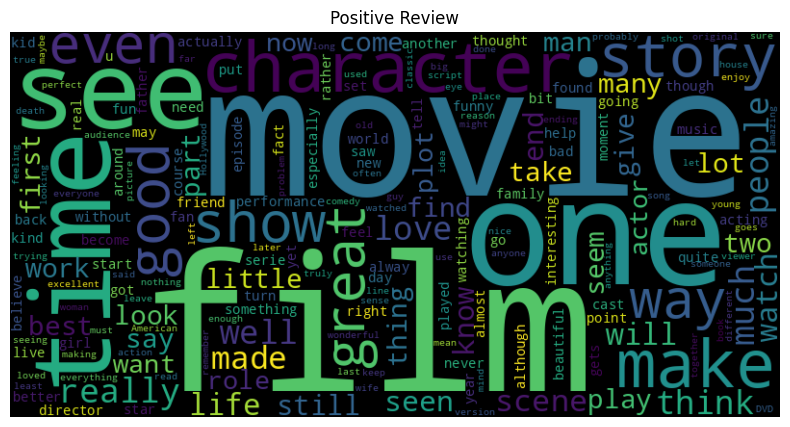

In [23]:
positive = train_df[train_df['sentiment']==1]['Cleaned_sentence'].tolist()
generate_wordcloud(positive,'Positive Review')


plot negativ ereviews

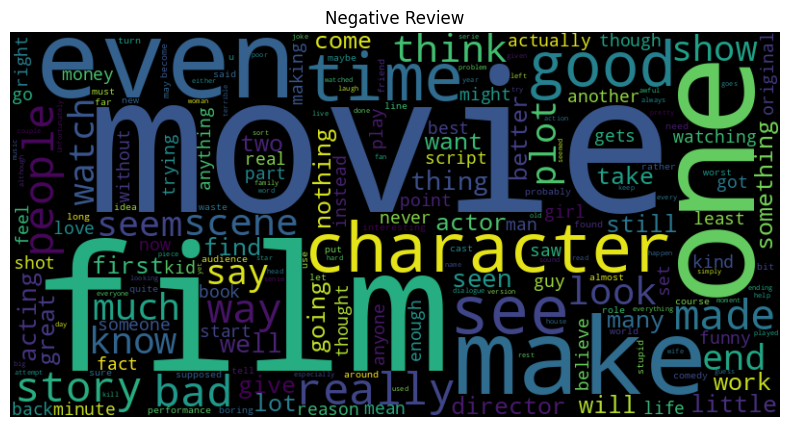

In [24]:
negative = train_df[train_df['sentiment']==0]['Cleaned_sentence'].tolist()
generate_wordcloud(negative,'Negative Review')


Separate input text and target sentiment of both train and test



In [25]:
# Training data
#Reviews = "[CLS] " +train_df['Cleaned_sentence'] + "[SEP]"
Reviews = train_df['Cleaned_sentence']
Target = train_df['sentiment']

# Test data
#test_reviews = "[CLS] " +test_df['Cleaned_sentence'] + "[SEP]"
test_reviews = test_df['Cleaned_sentence']
test_targets = test_df['sentiment']


Split TEST data into test and validation


In [26]:
x_val, x_test, y_val, y_test = train_test_split(test_reviews,
													test_targets,
													test_size=0.5, 
													stratify = test_targets)


Step 4: Tokenization & Encoding


BERT tokenization is used to convert the raw text into numerical inputs that can be fed into the BERT model. It tokenized the text and performs some preprocessing to prepare the text for the model’s input format. Let’s understand some of the key features of the BERT tokenization model.

BERT tokenizer splits the words into subwords or workpieces. For example, the word “geeksforgeeks” can be split into “geeks” “##for”, and”##geeks”. The “##” prefix indicates that the subword is a continuation of the previous one. It reduces the vocabulary size and helps the model to deal with rare or unknown words.
BERT tokenizer adds special tokens like [CLS], [SEP], and [MASK] to the sequence. These tokens have special meanings like :
[CLS] is used for classifications and to represent the entire input in the case of sentiment analysis,
[SEP] is used as a separator i.e. to mark the boundaries between different sentences or segments,
[MASK] is used for masking i.e. to hide some tokens from the model during pre-training.
BERT tokenizer gives their components as outputs:
input_ids: The numerical identifiers of the vocabulary tokens
token_type_ids: It identifies which segment or sentence each token belongs to.
attention_mask: It flags that inform the model which tokens to pay attention to and which to disregard.

Load the pre-trained BERT tokenizer


In [28]:
#Tokenize and encode the data using the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True,force_download=True)


Apply the BERT tokenization in training, testing and validation dataset


In [29]:
max_len= 128
# Tokenize and encode the sentences
X_train_encoded = tokenizer.batch_encode_plus(Reviews.tolist(),
											padding=True, 
											truncation=True,
											max_length = max_len,
											return_tensors='tf')

X_val_encoded = tokenizer.batch_encode_plus(x_val.tolist(), 
											padding=True, 
											truncation=True,
											max_length = max_len,
											return_tensors='tf')

X_test_encoded = tokenizer.batch_encode_plus(x_test.tolist(), 
											padding=True, 
											truncation=True,
											max_length = max_len,
											return_tensors='tf')


2024-05-10 18:36:36.302873: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-10 18:36:36.309516: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-10 18:36:36.309622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-10 18:36:36.310028: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

check encoded dataset

In [30]:
k = 0
print('Training Comments -->>',Reviews[k])
print('\nInput Ids -->>\n',X_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',X_train_encoded['attention_mask'][k])
print('\nLabels -->>',Target[k])


Training Comments -->> Felt mine was while watching thisbut it seems that is the reason for insanity running in the family in this film Not that makes a lot of sense anyway, as others have mentioned, this was one of Karloff's last films and it's only his screen presence that lends it any credibility at all It's sad that all of the great legends of the horror films in the sound era were eventually reduced to starring in low grade rubbish like this Marginally, Boris did get off slightly better than poor old Bela Lugosi but not by much Boris does his best and give him credit for trying to hold this mess together The strident background music doesn't help and distracts from any lucid moment Apart from Boris, the rest of the Mexican cast are dubbed into some strange, clipped, English monotone that is reminiscent of the type used in porn films of the late seventies At a guess I think it's Edgar Allen Poe's 'House of Usher' that this is taken from but you'd be hard pressed to find a great dea

step : 05build the classification model

Lad the model


In [31]:
# Intialize the model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


2024-05-10 18:38:44.511144: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Compile the model


In [32]:
# Compile the model with an appropriate optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


train the model

In [33]:
# Step 5: Train the model
history = model.fit(
	[X_train_encoded['input_ids'], X_train_encoded['token_type_ids'], X_train_encoded['attention_mask']],
	Target,
	validation_data=(
	[X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],y_val),
	batch_size=16,
	epochs=3
)


Epoch 1/3
1563/1563 [==============================] - 458s 285ms/step - loss: 0.3332 - accuracy: 0.8518 - val_loss: 0.2889 - val_accuracy: 0.8779
Epoch 2/3
1563/1563 [==============================] - 440s 281ms/step - loss: 0.1853 - accuracy: 0.9276 - val_loss: 0.3046 - val_accuracy: 0.8708
Epoch 3/3
1563/1563 [==============================] - 438s 280ms/step - loss: 0.0866 - accuracy: 0.9694 - val_loss: 0.3772 - val_accuracy: 0.8838


step _06 evaliate model

In [34]:
#Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(
	[X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']],
	y_test
)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')


391/391 [==============================] - 57s 145ms/step - loss: 0.3539 - accuracy: 0.8896
Test loss: 0.35392534732818604, Test accuracy: 0.8895999789237976


Save the model and tokenizer to the local folder
                        

In [35]:
path = './models/'
# Save tokenizer
tokenizer.save_pretrained(path +'/Tokenizer')

# Save model
model.save_pretrained(path +'/Model')


Load the model and tokenizer from the local folder


In [36]:
# Load tokenizer
bert_tokenizer = BertTokenizer.from_pretrained(path +'/Tokenizer')

# Load model
bert_model = TFBertForSequenceClassification.from_pretrained(path +'/Model')


Some layers from the model checkpoint at ./models//Model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at ./models//Model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Predict the sentiment of the test dataset


In [37]:
pred = bert_model.predict(
	[X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']])

# pred is of type TFSequenceClassifierOutput
logits = pred.logits

# Use argmax along the appropriate axis to get the predicted labels
pred_labels = tf.argmax(logits, axis=1)

# Convert the predicted labels to a NumPy array
pred_labels = pred_labels.numpy()

label = {
	1: 'positive',
	0: 'Negative'
}

# Map the predicted labels to their corresponding strings using the label dictionary
pred_labels = [label[i] for i in pred_labels]
Actual = [label[i] for i in y_test]

print('Predicted Label :', pred_labels[:10])
print('Actual Label :', Actual[:10])


391/391 [==============================] - 57s 142ms/step
Predicted Label : ['Negative', 'positive', 'Negative', 'Negative', 'Negative', 'positive', 'positive', 'Negative', 'Negative', 'Negative']
Actual Label : ['Negative', 'positive', 'Negative', 'Negative', 'positive', 'positive', 'positive', 'Negative', 'Negative', 'Negative']


classification report

In [38]:
print("Classification Report: \n", classification_report(Actual, pred_labels))


Classification Report: 
               precision    recall  f1-score   support

    Negative       0.88      0.90      0.89      6250
    positive       0.90      0.88      0.89      6250

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



Step 7: Prediction with user inputs


In [39]:
def Get_sentiment(Review, Tokenizer=bert_tokenizer, Model=bert_model):
	# Convert Review to a list if it's not already a list
	if not isinstance(Review, list):
		Review = [Review]

	Input_ids, Token_type_ids, Attention_mask = Tokenizer.batch_encode_plus(Review,
																			padding=True,
																			truncation=True,
																			max_length=128,
																			return_tensors='tf').values()
	prediction = Model.predict([Input_ids, Token_type_ids, Attention_mask])

	# Use argmax along the appropriate axis to get the predicted labels
	pred_labels = tf.argmax(prediction.logits, axis=1)

	# Convert the TensorFlow tensor to a NumPy array and then to a list to get the predicted sentiment labels
	pred_labels = [label[i] for i in pred_labels.numpy().tolist()]
	return pred_labels


Let’s predict with our own review


In [40]:
Review ='''Bahubali is a blockbuster Indian movie that was released in 2015. 
It is the first part of a two-part epic saga that tells the story of a legendary hero who fights for his kingdom and his love. 
The movie has received rave reviews from critics and audiences alike for its stunning visuals, 
spectacular action scenes, and captivating storyline.'''
Get_sentiment(Review)


1/1 [==============================] - 2s 2s/step


['positive']

In [41]:
Review = "So many twists I was on edge of seat the whole movie! LOVED IT!"
Get_sentiment(Review)


1/1 [==============================] - 0s 45ms/step


['positive']